In [58]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
import sympy as sy

## ¿Para que ángulo el area del segmento circular es igual a un cuarto del area de la circunferencia?

Para resolver el problema se  tiene como base una circufencia de radio r.

Se define un cuarto del área de la circunferencia, un porción de la circunferencia y el área del tringulo para dar resultado al área del segmento circular.

Área de una porción de la circunferencia:
$$ A_{por} = \frac{\theta}{2 \pi } {\pi} {r^2} \dots \frac { \theta r^2}{2}  $$

Área del tringulo:
$$ A_{tri} = \frac{r^2 \sin{\theta}}{2} $$

Cuarto de circunferencia 
$$ \frac{A_{cir}}{4} = \frac{ \pi r^2 }{4}$$

Utilizando la siguiente ecuación se tiene que 
$$ \frac{A_{cir}}{4} = A_{por} -  A_{tri} $$

Reemplazando por los valores obtenidos 

$$ \frac{ \pi r^2 }{4} =   \frac { \theta r^2}{2} 
 - \frac{r^2 \sin{\theta}}{2} $$
 
Quedando finalmente la siguiente expresión:

$$ \frac{\pi}{2} = \theta - \sin{\theta}$$

In [59]:
θ = np.linspace(-np.pi, np.pi) # Dominio de la función
f = lambda θ: θ - np.sin(θ) - np.pi / 2  #Se define la función a resolver
#Construcción del Dataframe
datos = {"θ":θ, "f(θ)":f(θ)}
df = pd.DataFrame(datos)


La solución de la ecuación está entre el intervalo [2,3]



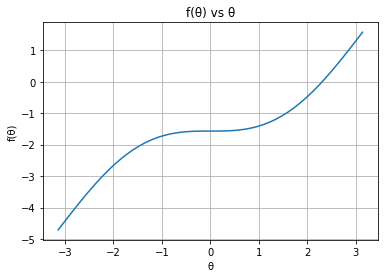

In [60]:
#Grafica de la función f(theta)
plt.plot(df["θ"],df["f(θ)"])
plt.xlabel("θ")
plt.ylabel("f(θ)")
plt.title("f(θ) vs θ")
plt.grid()
print("""
La solución de la ecuación está entre el intervalo [2,3]
""")

In [61]:
#Métodos para hallar la solución de la ecuación 
#Con la libreria Scipy.optimize
method_sec = optimize.newton(f,2) # Metodo de la secante
#==============================================================================
method_bise = optimize.bisect(f,1,3) # Metodo de biseccion 
#==============================================================================
punt = lambda θ : θ - f(θ) 
method_fixe = optimize.fixed_point(punt,1) #metodo del punto fijo
#==============================================================================
f_prima = lambda θ : 1 - np.cos(θ)
method_new = optimize.newton(f,2,f_prima)

print("===============================================================================")
print(f"La solución de la ecuación con el metodo de la secante es --> {method_sec:.5}")
print("===============================================================================")
print(f"La solución de la ecuación con el método de bisección es --> {method_bise:.5}")
print("===============================================================================")
print(f"La solución de la ecuación con el método de Punto fijo es --> {method_fixe:.5}")
print("===============================================================================")
print(f"La solución de la ecuación con el método de Newton es --> {method_new:.5}")
print("===============================================================================")

La solución de la ecuación con el metodo de la secante es --> 2.3099
La solución de la ecuación con el método de bisección es --> 2.3099
La solución de la ecuación con el método de Punto fijo es --> 2.3099
La solución de la ecuación con el método de Newton es --> 2.3099


### Caida libre de un cuerpo

In [62]:
t = np.linspace(-10,10,100)
t0 = sy.symbols("t")
s0 = sy.symbols("s0")
m = sy.symbols("m")
g = sy.symbols("g")
v0 = sy.symbols("v0")
k = sy.symbols("k")
pa = [300,0.25,32.17,0,0.1]

def caida(t,s0,m,g,v0,k):
    """
    Parametros
    """
    s = s0 - (m*g/k)*t 
    s1 = m*((m*g+k*v0)/k**2)*(1-np.exp((-k*t)/m))
    return s-s1
#Función en latex
def derivada1(t,s0,m,g,v0,k):
    """
    Parametros
    """
    s = -(m*g/k) 
    s1 = ((m*g+k*v0)/k)*(np.exp((-k*t)/m))
    return s-s1
def caida1(t,s0,m,g,v0,k):
    """
    Parametros
    """
    s = s0 - (m*g/k)*t 
    s1 = m*((m*g+k*v0)/k**2)*(1-sy.exp((-k*t)/m))
    return s-s1
#================================================================================================================
#Meétodo de la secante
print("====================================================================")
mS = optimize.newton(caida,2,args= pa)
print(f"El cero de la ecuación con el método de la secante es {mS:.4}")
print("====================================================================")
#Método de Newton
mN = optimize.newton(caida,2,derivada1,args=pa)
print(f"El cero de la ecuación con el método de newton es {mS:.4}")
print("====================================================================")

#Método del punto fijo
def metodo_punto(t,s0,m,g,v0,k):
    return t - caida(t,s0,m,g,v0,k)
mPF = optimize.fixed_point(metodo_punto,2,args=pa)
print(f"El cero de la ecuación con el método del punto fijo es {mPF:.4}")

print("====================================================================")
#Metodo de biseccion
def metodo_de_biseccion(t):
    s0 = 300
    m = 0.25
    g = 32.17
    v0 = 0
    k = 0.1
    return caida(t,s0,m,g,v0,k)
mB = optimize.bisect(metodo_de_biseccion,2,3)
print(f"El cero de la ecuación con el método de bisección es {mB:.4}")
print("====================================================================")

El cero de la ecuación con el método de la secante es 2.248
El cero de la ecuación con el método de newton es 2.248
El cero de la ecuación con el método del punto fijo es 2.248
El cero de la ecuación con el método de bisección es 2.248


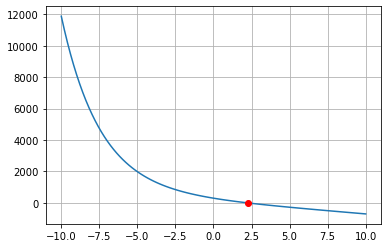

In [63]:
plt.plot(t,caida(t,*pa))
plt.plot(mS,caida(mS,*pa),"or")
plt.grid()

In [64]:
deri = sy.diff(caida1(t0,s0,m,g,v0,k),t0)
deri

-g*m/k - (g*m + k*v0)*exp(-k*t/m)/k

## Magetización Vs Temperatura

### Magetización reducida

La solución con el método de la secante es 0.958
La sulución con el punto fijo es 0.958


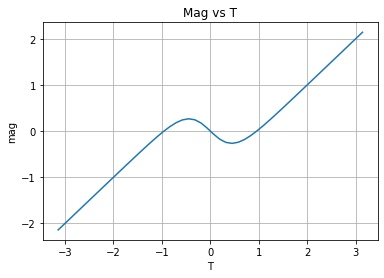

In [65]:
#Define la función de magetización vs T
#Parametros 
T0 = 0.5 #K
mT = np.linspace(-np.pi,np.pi) #Dominio de la función reducido
mag = lambda mT,T : mT - np.tanh(mT/T)
#Magnetización reducida para T = T0
print("===============================================================================")
def magne(mT):
    return mag(mT,0.5)
#Metodo de la secante
me_sec = optimize.newton(magne,1.5)
print(f"La solución con el método de la secante es {me_sec:.3}")
print("===============================================================================")
#Metoso del punto fijo
def metodo_fijo(mT):
    return mT - magne(mT)
met_punto = optimize.fixed_point(metodo_fijo,1.5)
print(f"La sulución con el punto fijo es {met_punto:.3}")
print("===============================================================================")
plt.plot(mT,mag(mT,T0))
plt.ylabel("mag")
plt.xlabel("T")
plt.title("Mag vs T")
plt.grid()

### Construccion de magnetisación con 100 valores

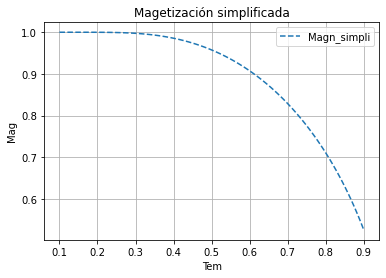

In [66]:
t1 = np.linspace(0.1,0.9,100)
def tem_(t):
    return np.array([t])

def meto(f,x0,args):
    s = optimize.newton(f,x0, args=args)
    return s
d = [meto(mag,T0,tem_(i)) for i in t1]
plt.plot(t1,d,"--", label= "Magn_simpli")
plt.grid()
plt.title("Magetización simplificada")
plt.xlabel("Tem")
plt.ylabel("Mag")
plt.legend()

### Construcción del fractal con numpy

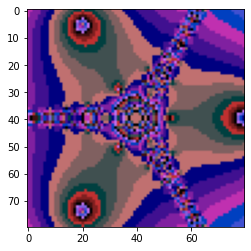

In [67]:
import numpy as np
import matplotlib.pylab as plt
from PIL import Image

Npx_X = 80 #Numero de pixeles en x
Npx_Y = 80 #Numero de pixeles en y

image = Image.new("RGB", (Npx_X, Npx_Y)) #Creacion de la imagen inicial

npx = np.arange(0, Npx_X)
npy = np.arange(0, Npx_Y)

xmin = -1
xmax = 1
ymin = -1
ymax = 1
#Transformación al plano complejo en un rectangulo (xmin, xmax), (ymin, ymax)
zx = npx * (xmax - xmin) / (Npx_X - 1)   + xmin
zy = npy * (ymax-ymin) / (Npx_Y - 1) + ymin

#Definicion  la funcion y las derivada 
def f(z): 
  return z**3 - 1

def fp(z): 
  return 3*z**2

h = 1E-4
def fpn(z, h): 
  return (f(z+h)-f(z))/h


a = 0.2
Niteraciones = 120
eps = 1E-8

x = - 1
for zx_ in zx:
  x = x + 1 
  y = -1
  for zy_ in zy: 
      y = y + 1
      Z_0 = complex(zx_, zy_)

      for i in range(0, Niteraciones): 
        Z = Z_0 - a * f(Z_0)/fp(Z_0)

        if( abs(Z-Z_0)<= eps):
          break 

        Z_0 = Z
      #print(i)
      #print(i)
      r, g, b = i % 4 *64 , i % 8 *16, i% 16* 16

      image.putpixel((x,y), (r,g,b) )


plt.imshow(image)
#plt.xlim(400, 600)
#plt.ylim(400, 523)